In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R = np.array([[2,0],[0,2]])
p_err = 0.2 # probability that side information is incorrect
px = np.array([0.5,0.5])
num_iter = 500

strat_v = np.linspace(0.55,0.95,9)

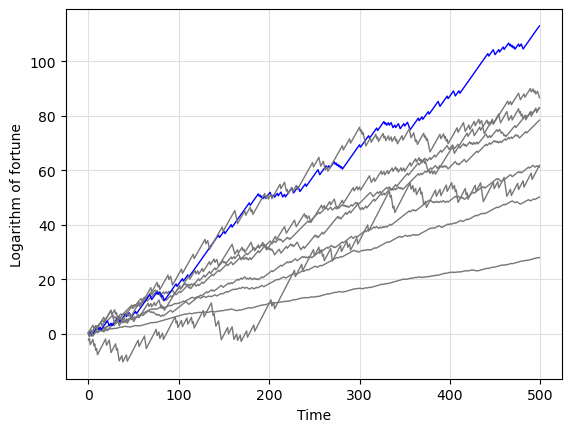

In [3]:
# A seed is set so that the results are reproducible
# Change the seed to see different random instances
g = np.random.default_rng(seed=1)

for s in strat_v:
  result = np.zeros(num_iter)
  S = np.array([[s,1-s],[1-s,s]])
  logW = np.log(S @ R)
  for i in range(num_iter):
    if g.uniform(0,1) < px[0]:
      x = 0
    else:
      x = 1
      
    if g.uniform(0,1) < p_err:
      y = (x + 1) % 2 # error
    else:
      y = x # no error
      
    if i == 0:
      result[i] = logW[y,x]
    else:
      result[i] = result[i-1] + logW[y,x]
      
  if s == 1-p_err:
    plt.plot(np.arange(num_iter),result,'b',linewidth=1)
  else:
    plt.plot(np.arange(num_iter),result,'#777777',linewidth=1)
    
plt.xlabel('Time')
plt.ylabel('Logarithm of fortune')
plt.gca().grid(visible=True,color='#e0e0e0')

plt.savefig('Figure1d.pdf',bbox_inches='tight')